In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import sys

sys.path.append('/home/yuliya/repos/cosybio/FedProt/evaluation_utils/')
from evaluation import evaluation_func as fp_eval


from collections import OrderedDict

In [2]:
color_dict = OrderedDict()

color_dict["Methods"] = OrderedDict({
    "FedProt":"black",
    "Fisher":"#E69F00",
    "Stouffer":"#D44400",
    "REM":"#009E73",
    "RankProd":"#2E5EAA"
})

In [3]:
root_dir = "/home/yuliya/repos/cosybio/FedProt/evaluation/simulated/"

# Plot boxplot

In [4]:
# Function to load data based on mode
def load_data(mode):
    rmse_pv_df = pd.read_csv(f"{root_dir}{mode}/aggreagated/RMSE.csv", index_col=0).T
    nrmse_pv_df = pd.read_csv(f"{root_dir}{mode}/aggreagated/NRMSE.csv", index_col=0).T
    r_pv_df = pd.read_csv(f"{root_dir}{mode}/aggreagated/r.csv", index_col=0).T
    rho_pv_df = pd.read_csv(f"{root_dir}{mode}/aggreagated/rho.csv", index_col=0).T
    return rmse_pv_df, nrmse_pv_df, r_pv_df, rho_pv_df

In [5]:
def plot_data(datasets, color_dict, titles, row_titles, figsize=(13, 7), grid_style='--', grid_width=0.5):
    fig, axes = plt.subplots(nrows=len(datasets), ncols=len(titles), figsize=figsize, sharey='col')
    
    for row, (data, row_title) in enumerate(zip(datasets, row_titles)):
        if row == 0:
            vertical_position = 0.72 - (row / 2) 
        else:
            vertical_position = 0.78 - (row / 2) 
        fig.text(0.02, vertical_position, row_title, va='center', ha='left', fontsize=12, rotation='vertical', transform=fig.transFigure)
        
        for col, (df, title) in enumerate(zip(data, titles)):
            ax = axes[row, col]
            for i, (method, color) in enumerate(color_dict['Methods'].items()):
                bp = ax.boxplot(df.loc[method], positions=[i], widths=0.6, patch_artist=True,
                                boxprops=dict(facecolor=color))
            ax.set_xticks(range(len(color_dict['Methods'])))
            ax.set_xticklabels(color_dict['Methods'].keys())  # Optional rotation
            ax.set_title(f"{title}")
            ax.set_ylabel('Value for -log10(adj.p-val)' if title == 'RMSE' else '')
            ax.grid(True, which='both', linestyle=grid_style, linewidth=grid_width)
    
    plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
    plt.suptitle('Comparison of Methods Across Different Metrics and Conditions')
    plt.show()


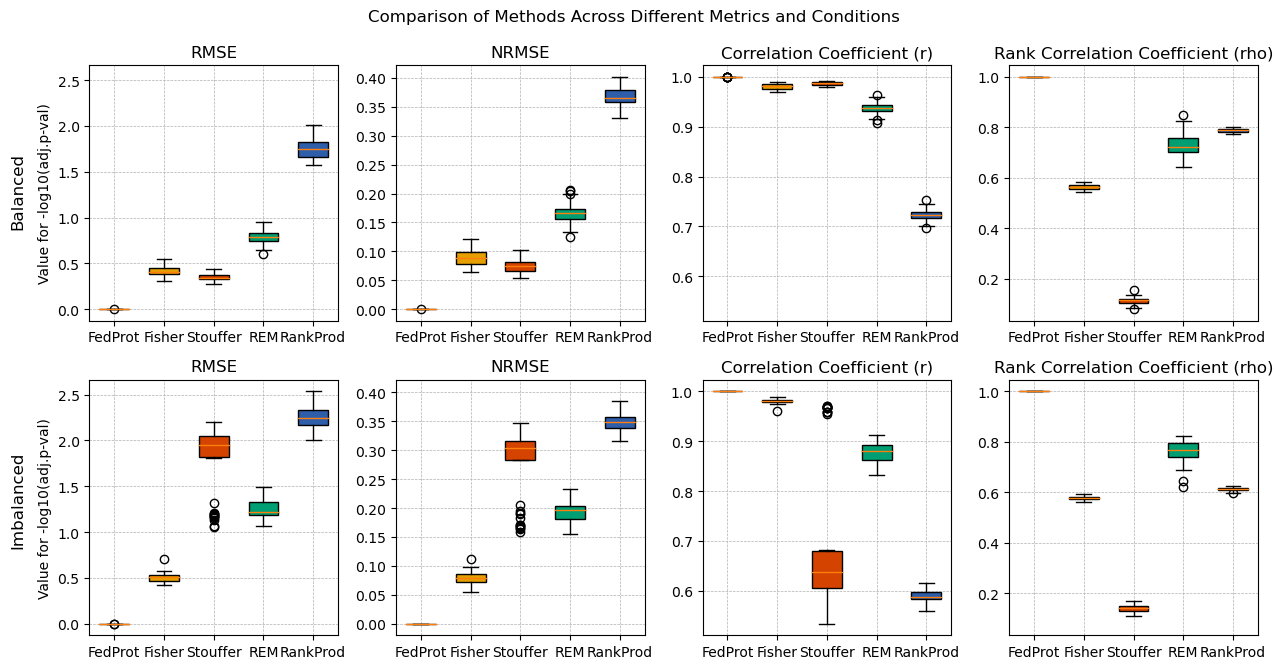

In [6]:
rmse_pv_df_bal, nrmse_pv_df_bal, r_pv_df_bal, rho_pv_df_bal = load_data("balanced")
rmse_pv_df_imbal, nrmse_pv_df_imbal, r_pv_df_imbal, rho_pv_df_imbal = load_data("imbalanced")

# Titles for each subplot
titles = ['RMSE', 'NRMSE', 'Correlation Coefficient (r)', 'Rank Correlation Coefficient (rho)']
row_titles = ['Balanced', 'Imbalanced']

# Plotting data grouped by scenario
datasets = [(rmse_pv_df_bal, nrmse_pv_df_bal, r_pv_df_bal, rho_pv_df_bal), (rmse_pv_df_imbal, nrmse_pv_df_imbal, r_pv_df_imbal, rho_pv_df_imbal)]

# Call the function
plot_data(datasets, color_dict, titles, row_titles)

# Plot correlations

In [7]:
def log_transform_df(df):
    df = df.replace(0,1e-300)
    df["pv_DEqMS"] = -np.log10(df["pv_DEqMS"])
    for m in ["FedProt", "Fisher","Stouffer","REM","RankProd"]:
        df["pv_"+m] = -np.log10(df["pv_"+m])
    return df

Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/simulated/balanced/results with 6000 genes. Adj.p-values were not log-transformed.
Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/simulated/imbalanced/results with 5998 genes. Adj.p-values were not log-transformed.
Plotting corrs using p-vals - log-transformed.


(5998, 12)


Balanced                         Imbalanced                        
                 r         ρ          RMSE          r         ρ          RMSE
FedProt   1.000000  1.000000  7.034783e-15   1.000000  1.000000  2.982762e-14
Fisher    0.983622  0.574510  3.809882e-01   0.977418  0.576803  5.259781e-01
Stouffer  0.988490  0.157537  3.218751e-01   0.631666  0.110267  1.914666e+00
REM       0.943740  0.707372  7.137551e-01   0.885905  0.621640  1.186287e+00
RankProd  0.731324  0.786675  1.667237e+00   0.585714  0.613020  2.164310e+00

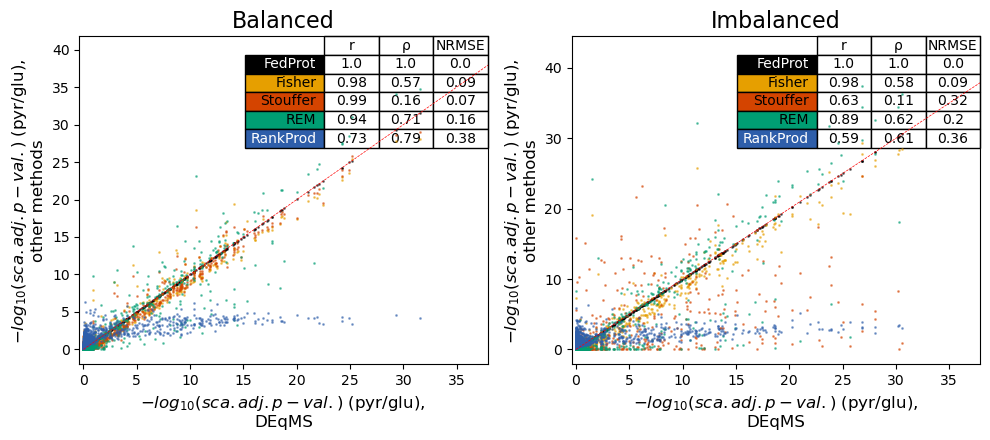

In [8]:
root_dir = "/home/yuliya/repos/cosybio/FedProt/evaluation/simulated/"

dfs = {}

fedprot_name="DPE.tsv"
deqms_name="res.tsv"
fisher_name="MA_CM.tsv"
rem_name="MA_REM.tsv"
stouffer_name="MA_Stouffer.tsv"
rankprod_name="MA_RankProd.tsv"


prefix = f"/36_"

workdir = root_dir + "balanced/results" 
df = fp_eval.read_results(workdir,
    fedprot_name=f"{prefix}{fedprot_name}",
    deqms_name=f"{prefix}{deqms_name}",
    fisher_name=f"{prefix}{fisher_name}",
    rem_name=f"{prefix}{rem_name}",
    stouffer_name=f"{prefix}{stouffer_name}",
    rankprod_name=f"{prefix}{rankprod_name}"
)
dfs["Balanced"] = df

workdir = root_dir + "imbalanced/results"
df = fp_eval.read_results(workdir,
    fedprot_name=f"{prefix}{fedprot_name}",
    deqms_name=f"{prefix}{deqms_name}",
    fisher_name=f"{prefix}{fisher_name}",
    rem_name=f"{prefix}{rem_name}",
    stouffer_name=f"{prefix}{stouffer_name}",
    rankprod_name=f"{prefix}{rankprod_name}"
)
dfs["Imbalanced"] = df


print(dfs["Imbalanced"].shape)
dfs["Imbalanced"].head(4)

log_dfs = {k: log_transform_df(v) for k,v in dfs.items()}

fp_eval.plt_results(
    log_dfs, 
    methods=["FedProt","Fisher","Stouffer","REM","RankProd"],
    color_dict=color_dict,
    what="pv_", 
    text="", dotsize=1,
    datasets=["Balanced", "Imbalanced"],
    add_table=True
)


Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/simulated/balanced/results with 6000 genes. Adj.p-values were not log-transformed.
Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/simulated/imbalanced/results with 5998 genes. Adj.p-values were not log-transformed.
Plotting corrs using p-vals - log-transformed.


(5998, 12)


Balanced                         Imbalanced                        
                 r         ρ          RMSE          r         ρ          RMSE
FedProt   1.000000  1.000000  7.034783e-15   1.000000  1.000000  2.982762e-14
Fisher    0.983622  0.574510  3.809882e-01   0.977418  0.576803  5.259781e-01
Stouffer  0.988490  0.157537  3.218751e-01   0.631666  0.110267  1.914666e+00
REM       0.943740  0.707372  7.137551e-01   0.885905  0.621640  1.186287e+00
RankProd  0.731324  0.786675  1.667237e+00   0.585714  0.613020  2.164310e+00

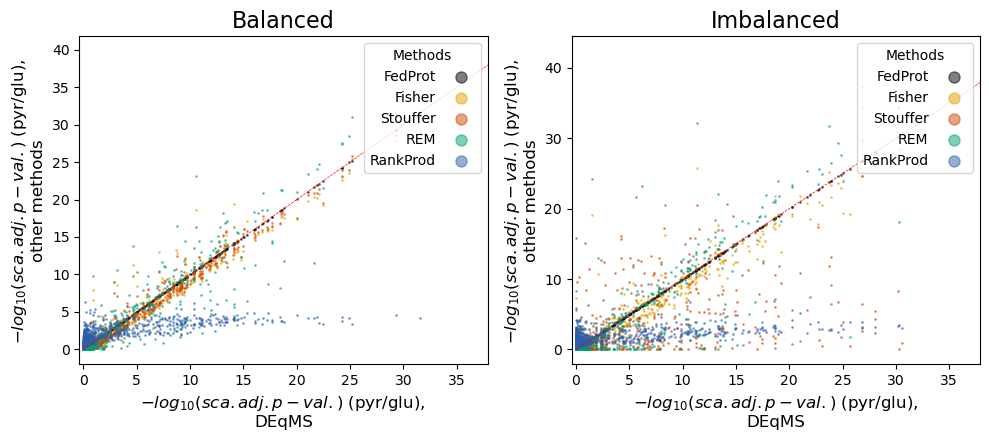

In [9]:
root_dir = "/home/yuliya/repos/cosybio/FedProt/evaluation/simulated/"

dfs = {}

fedprot_name="DPE.tsv"
deqms_name="res.tsv"
fisher_name="MA_CM.tsv"
rem_name="MA_REM.tsv"
stouffer_name="MA_Stouffer.tsv"
rankprod_name="MA_RankProd.tsv"


prefix = f"/36_"

workdir = root_dir + "balanced/results" 
df = fp_eval.read_results(workdir,
    fedprot_name=f"{prefix}{fedprot_name}",
    deqms_name=f"{prefix}{deqms_name}",
    fisher_name=f"{prefix}{fisher_name}",
    rem_name=f"{prefix}{rem_name}",
    stouffer_name=f"{prefix}{stouffer_name}",
    rankprod_name=f"{prefix}{rankprod_name}"
)
dfs["Balanced"] = df

workdir = root_dir + "imbalanced/results"
df = fp_eval.read_results(workdir,
    fedprot_name=f"{prefix}{fedprot_name}",
    deqms_name=f"{prefix}{deqms_name}",
    fisher_name=f"{prefix}{fisher_name}",
    rem_name=f"{prefix}{rem_name}",
    stouffer_name=f"{prefix}{stouffer_name}",
    rankprod_name=f"{prefix}{rankprod_name}"
)
dfs["Imbalanced"] = df


print(dfs["Imbalanced"].shape)
dfs["Imbalanced"].head(4)

log_dfs = {k: log_transform_df(v) for k,v in dfs.items()}

fp_eval.plt_results(
    log_dfs, 
    methods=["FedProt","Fisher","Stouffer","REM","RankProd"],
    color_dict=color_dict,
    what="pv_", 
    text="", dotsize=1,
    datasets=["Balanced", "Imbalanced"],
    add_table=False
)


Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/simulated/balanced/results with 6000 genes. Adj.p-values were not log-transformed.
Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/simulated/imbalanced/results with 5998 genes. Adj.p-values were not log-transformed.
Plotting corrs using logFC values.


(5998, 12)


Balanced                         Imbalanced                        
                 r         ρ          RMSE          r         ρ          RMSE
FedProt   1.000000  1.000000  1.021660e-15   1.000000  1.000000  3.838517e-15
Fisher    0.998277  0.996966  1.588301e-02   0.666945  0.598005  3.076395e-01
Stouffer  0.998277  0.996966  1.588301e-02   0.666945  0.598005  3.076395e-01
REM       0.969114  0.963897  6.609308e-02   0.892567  0.865155  1.319696e-01
RankProd  0.998277  0.996966  1.588301e-02   0.666945  0.598005  3.076395e-01

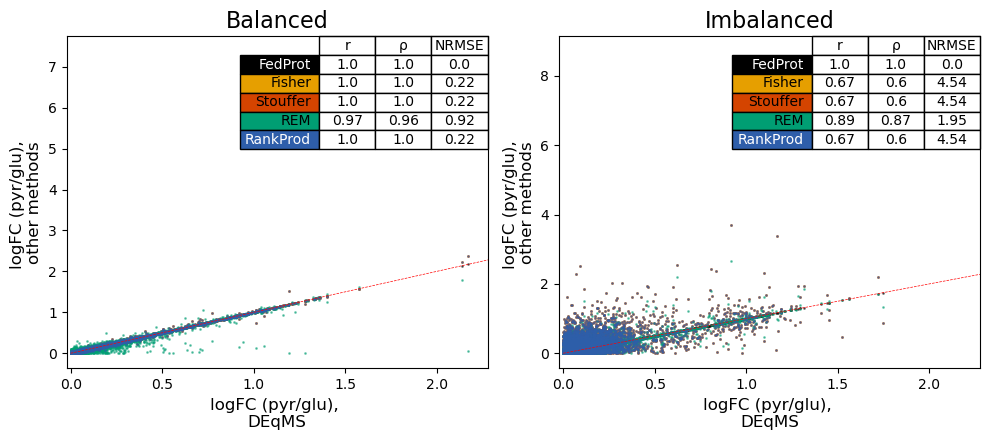

In [12]:
root_dir = "/home/yuliya/repos/cosybio/FedProt/evaluation/simulated/"

dfs = {}

fedprot_name="DPE.tsv"
deqms_name="res.tsv"
fisher_name="MA_CM.tsv"
rem_name="MA_REM.tsv"
stouffer_name="MA_Stouffer.tsv"
rankprod_name="MA_RankProd.tsv"


prefix = f"/36_"

workdir = root_dir + "balanced/results" 
df = fp_eval.read_results(workdir,
    fedprot_name=f"{prefix}{fedprot_name}",
    deqms_name=f"{prefix}{deqms_name}",
    fisher_name=f"{prefix}{fisher_name}",
    rem_name=f"{prefix}{rem_name}",
    stouffer_name=f"{prefix}{stouffer_name}",
    rankprod_name=f"{prefix}{rankprod_name}"
)
dfs["Balanced"] = df

workdir = root_dir + "imbalanced/results"
df = fp_eval.read_results(workdir,
    fedprot_name=f"{prefix}{fedprot_name}",
    deqms_name=f"{prefix}{deqms_name}",
    fisher_name=f"{prefix}{fisher_name}",
    rem_name=f"{prefix}{rem_name}",
    stouffer_name=f"{prefix}{stouffer_name}",
    rankprod_name=f"{prefix}{rankprod_name}"
)
dfs["Imbalanced"] = df


print(dfs["Imbalanced"].shape)
dfs["Imbalanced"].head(4)

log_dfs = {k: log_transform_df(v) for k,v in dfs.items()}

fp_eval.plt_results(
    log_dfs, 
    methods=["FedProt","Fisher","Stouffer","REM","RankProd"],
    color_dict=color_dict,
    what="lfc_", 
    text="", dotsize=1,
    datasets=["Balanced", "Imbalanced"],
    add_table=True
)


# Jaccard plot

In [10]:
root_dir = "/home/yuliya/repos/cosybio/FedProt/evaluation/simulated/"
jaccard_topN_dfs ={

    "Balanced": pd.read_csv(f"{root_dir}balanced/aggreagated/jaccard_topN.csv", index_col=[1]),
    "Imbalanced": pd.read_csv(f"{root_dir}imbalanced/aggreagated/jaccard_topN.csv", index_col=[1])
}

# remove Unnamed: 0 column
for k, df in jaccard_topN_dfs.items():
    df.drop(df.columns[0], axis=1, inplace=True)


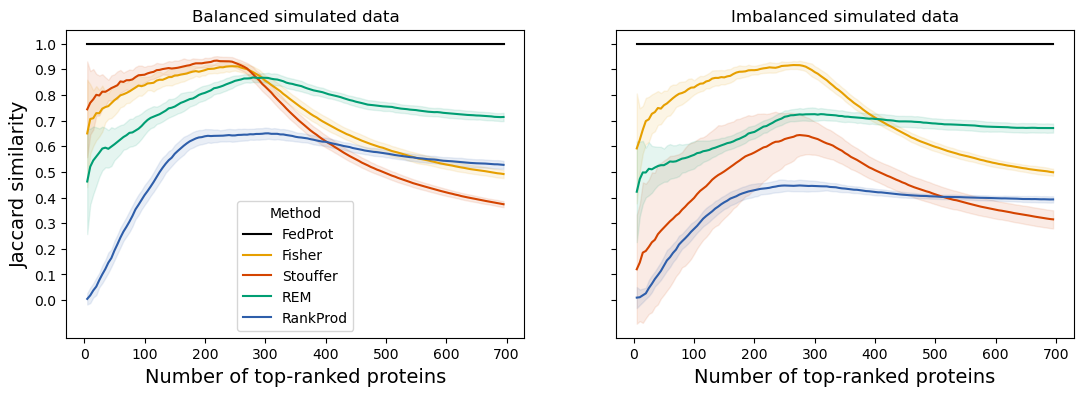

In [11]:
fp_eval.plot_with_confidence(
    jaccard_topN_dfs,
    ["FedProt", "Fisher", "Stouffer", "REM", "RankProd"], 
    color_dict,
    num_top_genes=list(jaccard_topN_dfs['Balanced'].columns)
)
